# Introduction
## Question
How have the lyrics of the most popular songs in the US changed over time?
## Why Does It Matter?
Music tends to reflect the current state of society. As our society has gotten more progressive and open, so have our popular music lyrics. By looking at how lyrics have changed since 1950, an arugment can be made regarding what is considered acceptable in the United States. For example, if technology is mentioned more often, it could be reflecting the rise of technology in our society. Additionally, an increase in lyrics about provactive actions can indicate that our society has relaxed our standards around sex. By analyzing different themes in in popular music lyrcis, commentary on the values of our society can argued.
# Sources
I am using a csv file created by Eunice Chan (https://github.com/eunice-chan/DH_PROJ_Billboard) that details the Billboard Top 100 from 1950-2018. Additionally, much of the intial data cleaning, formatting, and basic analysis is taken from Chan's project. Chan manually inputted lyrics, but I am hoping to webscrape so that I can have a larger library of words.  

I will be using Rishabh Parekh's project(https://github.com/rishabh-parekh/dh100final) as a guideline on how to webscrape from genius.com. While Parekh only found the lyrics for four songs using this technique, I am hoping to adapt it to be able to webscrape lyrics for all the Billboard Top 100 Songs 1950-2018. 

Furthermore, I have found inspiration for this project from a Medium article (https://medium.com/the-omnivore/the-evolution-of-the-american-pop-lyric-61ef31b24f03) that studied a similar question. I will be expanding on this by including more association words and looking at more themes. 

# Workflow
1. Upload 'Billboard100(1950-2018).csv'created by Eunice Chan to Jupyter Notebook.
2. Drop the manually added lyrics column and webscrape for all lyrics using technique by Rishabh Parekh.
3. Perform basic data analysis with influence from Chan's work in Jupyter Notebook.
## CTA Analysis:

1. Preprocessing Lyrics without punctuation, lyrics by phrases, lyrics by words.
2. Basic: Unique artists in decade, unique artists, number of times artists appear, unique phrases, average character count, average word count.
3. Frequency: Parts of speech distribution (by decade), sepculative words, personal pronouns (total, first vs second, first person singular vs first person plural, genders), lexical diversity.
4. Research Question Analysis: Analysis the frequency of words associated with chosen themes. 
5. Network graph
6. Sentiment analysis (by phrases)
7. Common words: direct count (without stopwords), TF-IDF, topic modeling

# Assumptions & Concerns
I am currently strugging to webscrape lyrics for all of the songs. It seems to be mainly a debugging issue that I should be able to get resolved. Once I fix that, I will need to ensure that the webscraping worked for all of the songs. In the case that not all lyrics could not be webscraped, I will need to ensure that every year (or decade) has the same number of songs to ensure that there is not unexpected bias. Furthermore, it will be difficult to idenitfy every association word for a theme. It is possible that a word could be referencing another theme or that it could be completeley unrelated in certain cases. 
    
# Tools & Methods
## Preliminary Importing

In [1]:
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from wordcloud import WordCloud

from collections import Counter
from string import punctuation

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import random 
import os
import re

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("seaborn-pastel")

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# Data

In [2]:
# link = 'https://drive.google.com/file/d/113qV4GTWfQxM2YJZ2UmhL5vGcv1AAfc8/view?usp=sharing'
# import pandas as pd
  
# # to get the id part of the file
# id = link.split("/")[-2]
  
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile("Billboard100(1950-2018).csv")  
  
# full_music = pd.read_csv("Billboard100(1950-2018).csv")
# print(full_music)


In [3]:
#This is the saved csv file from Google Sheets with lyrics added to web-scrapped data
full_music = pd.read_csv("Billboard100(1950-2018).csv")
pd.to_numeric(full_music["Year"])
top30 = full_music.loc[full_music["Position"].isin([str(i) for i in np.arange(1, 30)])].reset_index(drop=True)
#Get the songs from the Billboard entries every 5 years
#subset_music = full_music.loc[full_music["Year"]%5 == 0]
subset_music = full_music
#Only get the #1 and #2 song in each Billboard entry
data = subset_music.loc[subset_music["Position"].isin(["1", "2"])].reset_index(drop=True)
print(data.shape)
data

(138, 5)


,Position,Song,Artist,Year,Lyrics
0,1,"""Goodnight Irene""",Gordon Jenkins & The Weavers,1950,"Irene, goodnight\nIrene, goodnight\nGoodnight,..."
1,2,"""Mona Lisa""",Nat King Cole,1950,"Mona lisa, mona lisa, men have named you\nyou'..."
2,1,"""Too Young""",Nat King Cole,1951,"Too young to go steady\nToo young, I hear her ..."
3,2,"""Because of You""",Tony Bennett,1951,Because of you there's a song in my heart\nBec...
4,1,"""Blue Tango""",Leroy Anderson,1952,Here am I with you in a world of blue\nAnd we'...
...,...,...,...,...,...
133,2,"""Sorry""",Justin Bieber,2016,"Ooh, ooh\nOoh, ooh\nYou gotta go and get angry..."
134,1,"""Shape of You""",Ed Sheeran,2017,The club isn't the best place to find a lover\...
135,2,"""Despacito (Remix)""",Luis Fonsi and Daddy Yankee featuring Justin B...,2017,Comin' over in my direction\nSo thankful for t...
136,1,"""God's Plan""",Drake,2018,Yeah they wishin' and wishin' and wishin' and ...


In [4]:
no_lyrics = full_music.drop(columns = ['Lyrics'])
no_lyrics

,Position,Song,Artist,Year
0,1,"""Goodnight Irene""",Gordon Jenkins & The Weavers,1950
1,2,"""Mona Lisa""",Nat King Cole,1950
2,3,"""Third Man Theme""",Anton Karas,1950
3,4,"""Sam's Song""",Gary & Bing Crosby,1950
4,5,"""Simple Melody""",Gary & Bing Crosby,1950
...,...,...,...,...
6326,96,"""One Number Away""",Luke Combs,2018
6327,97,"""Powerglide""",Rae Sremmurd featuring Juicy J,2018
6328,98,"""IDGAF""",Dua Lipa,2018
6329,99,"""Mi Gente""",J Balvin and Willy William featuring Beyoncé,2018


In [5]:
song_artist = no_lyrics.drop(columns = ['Position','Year'])
song_artist

,Song,Artist
0,"""Goodnight Irene""",Gordon Jenkins & The Weavers
1,"""Mona Lisa""",Nat King Cole
2,"""Third Man Theme""",Anton Karas
3,"""Sam's Song""",Gary & Bing Crosby
4,"""Simple Melody""",Gary & Bing Crosby
...,...,...
6326,"""One Number Away""",Luke Combs
6327,"""Powerglide""",Rae Sremmurd featuring Juicy J
6328,"""IDGAF""",Dua Lipa
6329,"""Mi Gente""",J Balvin and Willy William featuring Beyoncé


In [6]:
song_artist['Song'] = song_artist['Song'].str.replace("\"", "")
song_artist

,Song,Artist
0,Goodnight Irene,Gordon Jenkins & The Weavers
1,Mona Lisa,Nat King Cole
2,Third Man Theme,Anton Karas
3,Sam's Song,Gary & Bing Crosby
4,Simple Melody,Gary & Bing Crosby
...,...,...
6326,One Number Away,Luke Combs
6327,Powerglide,Rae Sremmurd featuring Juicy J
6328,IDGAF,Dua Lipa
6329,Mi Gente,J Balvin and Willy William featuring Beyoncé


In [7]:
song_artist['Song/Artist'] = song_artist.values.tolist()
song_artist

,Song,Artist,Song/Artist
0,Goodnight Irene,Gordon Jenkins & The Weavers,"[Goodnight Irene, Gordon Jenkins & The Weavers]"
1,Mona Lisa,Nat King Cole,"[Mona Lisa, Nat King Cole]"
2,Third Man Theme,Anton Karas,"[Third Man Theme, Anton Karas]"
3,Sam's Song,Gary & Bing Crosby,"[Sam's Song, Gary & Bing Crosby]"
4,Simple Melody,Gary & Bing Crosby,"[Simple Melody, Gary & Bing Crosby]"
...,...,...,...
6326,One Number Away,Luke Combs,"[One Number Away, Luke Combs]"
6327,Powerglide,Rae Sremmurd featuring Juicy J,"[Powerglide, Rae Sremmurd featuring Juicy J]"
6328,IDGAF,Dua Lipa,"[IDGAF, Dua Lipa]"
6329,Mi Gente,J Balvin and Willy William featuring Beyoncé,"[Mi Gente, J Balvin and Willy William featurin..."


In [8]:
import requests
from bs4 import BeautifulSoup
defaults = {
    'request': {
        'token': 'i507Djjp1UurKonxzH_iyuCAP1Af_zSAjQ_eM7fZDV_ucIoEIhACnGMU3tT6IhDz',
        'base_url': 'https://api.genius.com'
    },
    'message': {
        'search_fail': 'The lyrics for this song were not found!',
        'wrong_input': 'Wrong number of arguments.\n' \
                       'Use two parameters to perform a custom search ' \
                       'or none to get the song currently playing on Spotify.'
    }
}

In [9]:
def request_song_info(song_title, artist_name):
    base_url = defaults['request']['base_url']
    headers = {'Authorization': 'Bearer ' + defaults['request']['token']}
    search_url = base_url + '/search'
    data = {'q': song_title + ' ' + artist_name}
    response = requests.get(search_url, data=data, headers=headers)
    return response

In [10]:
# def scrap_song_url(url):
#     print(url)
#     page = requests.get(url)
#     html = BeautifulSoup(page.text, 'html.parser')
#     [h.extract() for h in html('script')]
#     lyrics = html.find('div', class_='lyrics').get_text()
#     return lyrics

In [11]:
def scrap_song_url(url):
    print(url)
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')
    [h.extract() for h in html('script')]
    lyrics = html.select('#pipeline div .lyrics')
    for lyric in lyrics:
      lyric_text = lyric.get_text(strip = True)
      print(lyric_text)
    return lyrics

In [12]:
def get_song_lyrics(song_title,artist_name):
    lyrics_dict= {}
    lyrics_df = pd.DataFrame()
    response = request_song_info(song_title, artist_name)
    json = response.json()
    remote_song_info = None
    for hit in json['response']['hits']:
        if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
            remote_song_info = hit
            break
    # Extract lyrics from URL if song was found
    if remote_song_info is not None:
        song_url = remote_song_info['result']['url']
        lyrics = scrap_song_url(song_url)
        lyrics_dict.update({"artist_name" : artist_name, "song_title" : song_title, "lyrics": lyrics})
        lyrics_df = lyrics_df.append(lyrics_dict, ignore_index=True)
        ly_file = song_title+"_"+artist_name+".csv"; 
        lyrics_df.to_csv(ly_file,index=False)
    else:
        print(defaults['message']['search_fail'])
    return lyrics_df

In [13]:
scrap_song_url('https://genius.com/Anton-karas-the-third-man-theme-lyrics')

https://genius.com/Anton-karas-the-third-man-theme-lyrics


[]

In [14]:
song_listed = song_artist['Song'].tolist()

In [15]:
artist_list = song_artist['Artist'].tolist()

In [16]:
combined = list(zip(song_listed, artist_list))
combined

[('Goodnight Irene', 'Gordon Jenkins & The Weavers'),
 ('Mona Lisa', 'Nat King Cole'),
 ('Third Man Theme', 'Anton Karas'),
 ("Sam's Song", 'Gary & Bing Crosby'),
 ('Simple Melody', 'Gary & Bing Crosby'),
 ('Music, Music, Music', 'Teresa Brewer'),
 ('Third Man Theme', 'Guy Lombardo'),
 ('Chattanoogie Shoe Shine Boy', 'Red Foley'),
 ('Harbor Lights', 'Sammy Kaye'),
 ("It Isn't Fair", 'Sammy Kaye & Don Cornell'),
 ("If I Knew You Were Coming I'd have Baked a Cake", 'Eileen Barton'),
 ("Bonaparte's Retreat", 'Kay Starr'),
 ('Tzena, Tzena, Tzena', 'Gordon Jenkins & The Weavers'),
 ("There's No Tomorrow", 'Tony Martin'),
 ('The Thing', 'Phil Harris'),
 ('Sentimental Me', 'Ames Brothers'),
 ('I Wanna Be Loved', 'Andrews Sisters & Gordon Jenkins'),
 ('Tennessee Waltz', 'Patti Page'),
 ("I Can Dream, Can't I", 'Andrews Sisters & Gordon Jenkins'),
 ("I'll Never Be Free", 'Tennessee Ernie Ford & Kay Starr'),
 ('All My Love', 'Patti Page'),
 ('My Foolish Heart', 'Gordon Jenkins'),
 ('Rag Mop', 'A

In [17]:
# song_list = combined #how do i correctly format this to create list of song and artist for every song in csv??
# # Search for matches in request response
# all_lyrics_df = pd.DataFrame()
# for song_title, artist_name in song_list:
#     # File with Lyrics data. 
#     print(song_title)
#     print(artist_name) 
#     ly_file = song_title+"_"+artist_name+".csv"; 
#     if os.path.isfile(ly_file):
#         lyrics_df = pd.read_csv(ly_file)
#     else:
#         lyrics_df = get_song_lyrics(song_title,artist_name)
#     all_lyrics_df = all_lyrics_df.append(lyrics_df, ignore_index=True)
# print(all_lyrics_df.shape)

In [18]:
song_listed

['Goodnight Irene',
 'Mona Lisa',
 'Third Man Theme',
 "Sam's Song",
 'Simple Melody',
 'Music, Music, Music',
 'Third Man Theme',
 'Chattanoogie Shoe Shine Boy',
 'Harbor Lights',
 "It Isn't Fair",
 "If I Knew You Were Coming I'd have Baked a Cake",
 "Bonaparte's Retreat",
 'Tzena, Tzena, Tzena',
 "There's No Tomorrow",
 'The Thing',
 'Sentimental Me',
 'I Wanna Be Loved',
 'Tennessee Waltz',
 "I Can Dream, Can't I",
 "I'll Never Be Free",
 'All My Love',
 'My Foolish Heart',
 'Rag Mop',
 'Bewitched',
 'Hoop-Dee-Doo',
 'Bewitched',
 'Can Anyone Explain?',
 'My Foolish Heart',
 'Dear Hearts and Gentle People',
 'The Cry of the Wild Goose',
 'Too Young',
 'Because of You',
 'How High the Moon',
 'Come on-a My House',
 'Be My Love',
 'On Top of Old Smoky',
 'Cold, Cold Heart',
 'If',
 'The Loveliest Night of the Year',
 'Tennessee Waltz',
 'Jezebel',
 'I Get Ideas',
 "Mockin' Bird Hill",
 "Mockin' Bird Hill",
 'My Heart Cries for You',
 "(It's No) Sin",
 'Sound Off',
 'Sweet Violets',
 '

In [19]:
#Remove punctuation
data["Lyrics w/o Punctuation"] = [lyrics.lower().replace("\n"," ").translate(str.maketrans('', '', punctuation)) 
                                  for lyrics in data["Lyrics"]]
#Phrase tokenize
data["Lyrics by Phrases"] = [set([phrase.translate(str.maketrans('', '', punctuation)) 
                                  for phrase in lyrics.lower().split("\n") if phrase])
                             for lyrics in data["Lyrics"]]
#Word tokenize
data["Lyrics by Words"] = [word_tokenize(lyrics) for lyrics in data["Lyrics w/o Punctuation"]]
#Create a decade column
data["Decade"] = [int(year/10) for year in data["Year"]]
music = data.groupby("Decade").agg(list)
music["Decade"] = [str(year[0])+"s" for year in music["Year"]]
#Create a table with the decade and the lyrics of the top 2 songs in XXX0 and XXX5
music = music.reset_index(drop=True)[["Decade", "Lyrics", "Lyrics w/o Punctuation", 
                                      "Lyrics by Phrases", "Lyrics by Words"]]
music

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words
0,1950s,"[Irene, goodnight\nIrene, goodnight\nGoodnight...",[irene goodnight irene goodnight goodnight ire...,"[{stop staying out late at night, ill see you ...","[[irene, goodnight, irene, goodnight, goodnigh..."
1,1960s,[There's a summer place\nWhere it may rain or ...,[theres a summer place where it may rain or st...,"[{when seen through the eyes, theres a summer ...","[[theres, a, summer, place, where, it, may, ra..."
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{i will comfort you ooo, see how they shine, ...","[[when, youre, weary, feeling, small, when, te..."
3,1980s,"[Color me your color, baby\nColor me your car\...",[color me your color baby color me your car co...,"[{call me call me in a sweet design, call me c...","[[color, me, your, color, baby, color, me, you..."
4,1990s,[I know there's pain\nWhy do you lock yourself...,[i know theres pain why do you lock yourself u...,"[{just open your heart and your mind, dont you...","[[i, know, theres, pain, why, do, you, lock, y..."
5,2000s,[I can feel the magic floating in the air\nBei...,[i can feel the magic floating in the air bein...,"[{i can feel you breathe just breathe, theres ...","[[i, can, feel, the, magic, floating, in, the,..."
6,2010s,[Wake up in the morning feeling like P Diddy (...,[wake up in the morning feeling like p diddy h...,"[{droptopping playing our favorite cds, cause ...","[[wake, up, in, the, morning, feeling, like, p..."


# Text Analysis
## Basic

In [20]:
top30["Decade"] = [int(year/10) for year in top30["Year"]]
artist_count = top30.groupby("Decade").agg(list)
#Count the number of unique artists in each decade (the rest have appeared on the list in the same decade)
artist_count["Unique Artists in Decade"] = [len(set(artists))/len(artists) for artists in artist_count["Artist"]]
all_artists = []
num_unique = []
for decade in artist_count["Artist"]:
    num_unique += [len(set([artist for artist in decade if artist not in all_artists]))/len(decade)]
    all_artists += decade
#Count the number of unique artists in each decade (the rest have appeared on the list in any of the previous decades)
artist_count["Unique Artists"] = num_unique
artist_count

,Position,Song,Artist,Year,Lyrics,Unique Artists in Decade,Unique Artists
Decade,,,,,,,
195,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Goodnight Irene"", ""Mona Lisa"", ""Third Man Th...","[Gordon Jenkins & The Weavers, Nat King Cole, ...","[1950, 1950, 1950, 1950, 1950, 1950, 1950, 195...","[Irene, goodnight\nIrene, goodnight\nGoodnight...",0.558621,0.558621
196,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Theme from A Summer Place"", ""He'll Have to G...","[Percy Faith, Jim Reeves, The Everly Brothers,...","[1960, 1960, 1960, 1960, 1960, 1960, 1960, 196...",[There's a summer place\nWhere it may rain or ...,0.768966,0.703448
197,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Bridge Over Troubled Water"", ""(They Long to ...","[Simon & Garfunkel, The Carpenters, The Guess ...","[1970, 1970, 1970, 1970, 1970, 1970, 1970, 197...","[When you're weary, feeling small\nWhen tears ...",0.741379,0.665517
198,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Call Me"", ""Another Brick in the Wall, Part I...","[Blondie, Pink Floyd, Olivia Newton-John, Mich...","[1980, 1980, 1980, 1980, 1980, 1980, 1980, 198...","[Color me your color, baby\nColor me your car\...",0.710345,0.627586
199,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Hold On"", ""It Must Have Been Love"", ""Nothing...","[Wilson Phillips, Roxette, Sinéad O'Connor, Be...","[1990, 1990, 1990, 1990, 1990, 1990, 1990, 199...",[I know there's pain\nWhy do you lock yourself...,0.693103,0.617241
200,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Breathe"", ""Smooth"", ""Maria Maria"", ""I Wanna ...","[Faith Hill, Santana featuring Rob Thomas, San...","[2000, 2000, 2000, 2000, 2000, 2000, 2000, 200...",[I can feel the magic floating in the air\nBei...,0.741379,0.672414
201,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[""Tik Tok"", ""Need You Now"", ""Hey, Soul Sister""...","[Kesha, Lady Antebellum, Train, Katy Perry fea...","[2010, 2010, 2010, 2010, 2010, 2010, 2010, 201...",[Wake up in the morning feeling like P Diddy (...,0.727969,0.666667


In [21]:
#Count all the times the artists appear.
all_artists_count = Counter(all_artists)
all_artists_df = pd.DataFrame(data={"Name":list(all_artists_count.keys()),
                                    "Count":list(all_artists_count.values())}).sort_values("Count", ascending=False)
all_artists_df.head()

,Name,Count
96,Elvis Presley,16
744,Mariah Carey,15
1026,Rihanna,11
19,Perry Como,11
652,Madonna,10


In [22]:
percent = []
for i in np.arange(len(music["Lyrics by Phrases"])):
    unique_phrases = music["Lyrics by Phrases"][i]
    decade_percent = []
    for j in np.arange(len(unique_phrases)):
        total_phrases = music["Lyrics"][i][j]
        total_phrases = [phrase.translate(str.maketrans('', '', punctuation)) 
                         for phrase in total_phrases.lower().split("\n") if phrase]
        decade_percent += [len(unique_phrases[j])/len(total_phrases)]
    percent += [np.mean(decade_percent)]
music["Unique Phrases"] = percent
music

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words,Unique Phrases
0,1950s,"[Irene, goodnight\nIrene, goodnight\nGoodnight...",[irene goodnight irene goodnight goodnight ire...,"[{stop staying out late at night, ill see you ...","[[irene, goodnight, irene, goodnight, goodnigh...",0.691877
1,1960s,[There's a summer place\nWhere it may rain or ...,[theres a summer place where it may rain or st...,"[{when seen through the eyes, theres a summer ...","[[theres, a, summer, place, where, it, may, ra...",0.716334
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{i will comfort you ooo, see how they shine, ...","[[when, youre, weary, feeling, small, when, te...",0.637274
3,1980s,"[Color me your color, baby\nColor me your car\...",[color me your color baby color me your car co...,"[{call me call me in a sweet design, call me c...","[[color, me, your, color, baby, color, me, you...",0.690124
4,1990s,[I know there's pain\nWhy do you lock yourself...,[i know theres pain why do you lock yourself u...,"[{just open your heart and your mind, dont you...","[[i, know, theres, pain, why, do, you, lock, y...",0.655304
5,2000s,[I can feel the magic floating in the air\nBei...,[i can feel the magic floating in the air bein...,"[{i can feel you breathe just breathe, theres ...","[[i, can, feel, the, magic, floating, in, the,...",0.588911
6,2010s,[Wake up in the morning feeling like P Diddy (...,[wake up in the morning feeling like p diddy h...,"[{droptopping playing our favorite cds, cause ...","[[wake, up, in, the, morning, feeling, like, p...",0.615699


In [23]:
#Get average character count
music["Avg Character Count"] = [np.mean([len(lyrics.replace(" ","")) 
                                         for lyrics in decade])
                                for decade in music["Lyrics w/o Punctuation"]]
#Get average word count
music["Avg Word Count"] = [np.mean([len(lyrics) 
                                    for lyrics in decade]) 
                           for decade in music["Lyrics by Words"]]
music.head()

,Decade,Lyrics,Lyrics w/o Punctuation,Lyrics by Phrases,Lyrics by Words,Unique Phrases,Avg Character Count,Avg Word Count
0,1950s,"[Irene, goodnight\nIrene, goodnight\nGoodnight...",[irene goodnight irene goodnight goodnight ire...,"[{stop staying out late at night, ill see you ...","[[irene, goodnight, irene, goodnight, goodnigh...",0.691877,681.80,174.40
1,1960s,[There's a summer place\nWhere it may rain or ...,[theres a summer place where it may rain or st...,"[{when seen through the eyes, theres a summer ...","[[theres, a, summer, place, where, it, may, ra...",0.716334,704.05,187.10
2,1970s,"[When you're weary, feeling small\nWhen tears ...",[when youre weary feeling small when tears are...,"[{i will comfort you ooo, see how they shine, ...","[[when, youre, weary, feeling, small, when, te...",0.637274,951.75,252.45
3,1980s,"[Color me your color, baby\nColor me your car\...",[color me your color baby color me your car co...,"[{call me call me in a sweet design, call me c...","[[color, me, your, color, baby, color, me, you...",0.690124,1048.25,280.50
4,1990s,[I know there's pain\nWhy do you lock yourself...,[i know theres pain why do you lock yourself u...,"[{just open your heart and your mind, dont you...","[[i, know, theres, pain, why, do, you, lock, y...",0.655304,1449.10,392.35


## Visualization
### Unique Artists

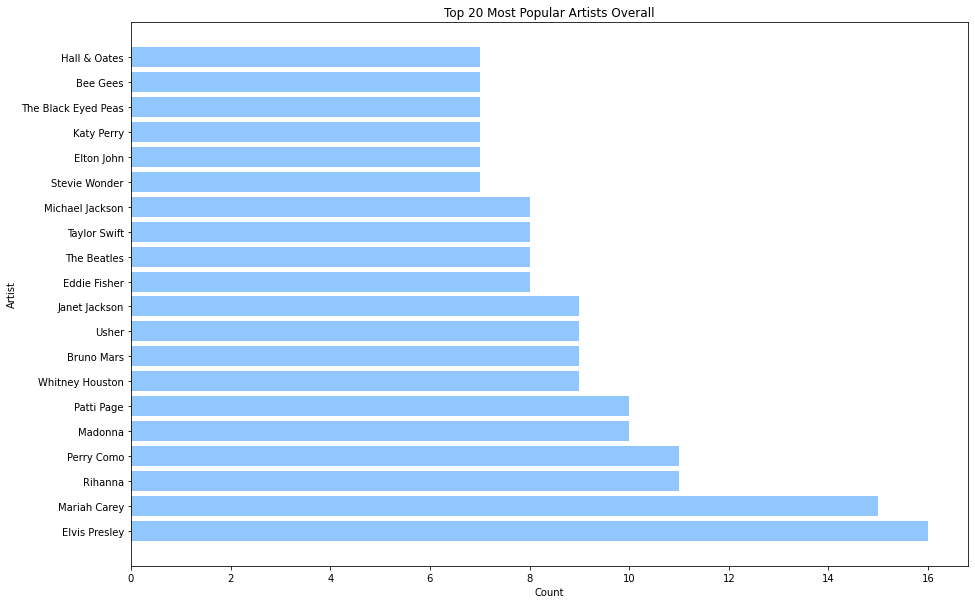

In [24]:
all_artists = Counter(all_artists_df)
plt.figure(figsize=(15,10))
plt.barh(all_artists_df["Name"][:20], all_artists_df["Count"][:20])
plt.xlabel("Count")
plt.ylabel("Artist")
plt.title("Top 20 Most Popular Artists Overall");
#plt.savefig("img/popularbar.tiff");

Range: 16 to 1


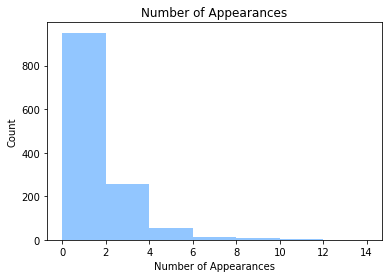

In [25]:
counts = list(all_artists_df["Count"])
print("Range:", str(counts[0]), "to", str(counts[-1]))
plt.hist(all_artists_df["Count"], bins=np.arange(0, 16, 2))
plt.xlabel("Number of Appearances")
plt.ylabel("Count")
plt.title("Number of Appearances");
#plt.savefig("img/numappear.tiff");

### Repetitiveness

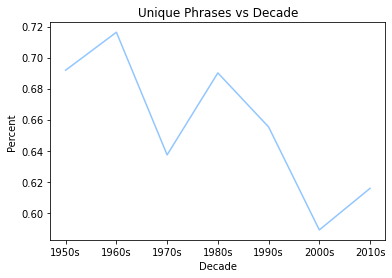

In [26]:
plt.plot(music["Decade"], music["Unique Phrases"])
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Unique Phrases vs Decade");
#plt.savefig("img/repvsdecade.tiff");

### Number of Characters

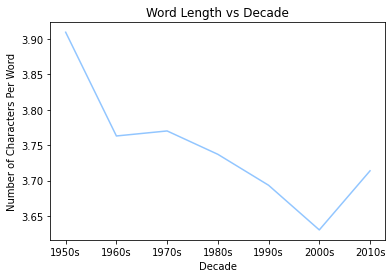

In [27]:
plt.plot(music["Decade"], music["Avg Character Count"]/music["Avg Word Count"])
plt.ylabel("Number of Characters Per Word")
plt.xlabel("Decade")
plt.title("Word Length vs Decade");
#plt.savefig("img/wordlenvsdecade.tiff");

### Number of Words

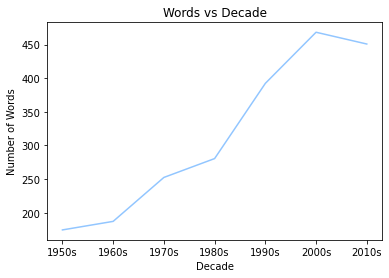

In [28]:
plt.plot(music["Decade"], music["Avg Word Count"])
plt.ylabel("Number of Words")
plt.xlabel("Decade")
plt.title("Words vs Decade");
#plt.savefig("img/wordsvsdecade.tiff");

## Frequency Analysis

In [29]:
#https://medium.com/the-omnivore/the-evolution-of-the-american-pop-lyric-61ef31b24f03
#https://reversedictionary.org/wordsfor/sexual
#https://en.wiktionary.org/wiki/Category:English_swear_words

decade_pov_single_1 = []
decade_pov_plural_1 = []
decade_pov_2 = []
decade_male = []
decade_female = []
decade_pov_inc = []
decade_pov_ego = []
decade_tech = []
decade_swear = []
decade_sex = []
decade_love = []
decade_names = []
first_person_single = ["i", "me", "my", "myself", "mine"]
first_person_plural = ["we", "us", "our", "ours"]
second_person = ["you", "your", "yours", "yourself", "yourselves"]
male = ["he", "his", "him"]
female = ["she", "her", "hers"]
technology = ["iphone", "phone", "call", "ring", "message", "mobile", "ring", "telephone", "cell", "beep", "dial", 
             "computer", "text", "email", "laptop", "landline", "number", "robot", "machine","nokia", "samsung",
             "apple", "google", "digit", "digits", "cellular", "cellphone", "screen", "app"]
swear_words = ["arse", "ass", "asshole", "bastard", "bitch", "bitches", "bullshit", "cock", "crap","cunt","cum", 
               "damn", "dick", "fuck","fucker", "fucked","goddamn","motherfucker", "piss", "pussy", "shit", "slut"]
sex = ["fuck", "night", "bed", "sex", "dick", "cock", "pussy", "penis", "vagina", "intimacy", "intimate", 
               "wet", "erotic", "screw", "bang", "suck", "shag", "intercourse", "virgin", "ball", "hips", "hot",
               "steamy", "sexy"]
adoration = ["love", "heart", "adore"]
pet_names = ["shawty", "honey", "baby", "babe", "shorty", "sweetie"]

for decade in music["Lyrics by Words"]:
    
    songs_pov_single_1 = []
    songs_pov_plural_1 = []
    songs_pov_2 = []
    songs_male = []
    songs_female = []
    songs_tech = []
    songs_swear = []
    songs_sex = []
    songs_love = []
    songs_names = []
    
    for song in decade:
        
        words_first_single = 0
        words_first_plural = 0
        words_second = 0
        words_male = 0
        words_female = 0
        words_tech = 0
        words_swear = 0
        words_sex = 0
        words_love = 0
        words_names = 0
        
        for word in song:
            
            #Count number of words in first person singular
            if word in first_person_single:
                words_first_single += 1
                
            #Count number of words in first person plural
            if word in first_person_plural:
                words_first_plural += 1
                
            #Count number of words in second person
            if word in second_person:
                words_second += 1
                
            #Count number of male pronouns
            if word in male:
                words_male += 1
                
            #Count number of female pronouns
            if word in female:
                words_female += 1
                
            #Count number of technology references
            if word in technology:
                words_tech += 1
                
            #Count number of swear words
            if word in swear_words:
                words_swear += 1 
                
            #Count number of sexual references
            if word in sex:
                words_sex += 1
                
            #Count number of love references
            if word in adoration:
                words_love += 1 
                
            #Count number of pet name references
            if word in pet_names:
                words_names += 1     
            
                
                
        #Put it in terms of the whole song
        song_len = len(song)
        songs_pov_single_1 += [words_first_single/song_len]
        songs_pov_plural_1 += [words_first_plural/song_len]
        songs_pov_2 += [words_second/song_len]
        songs_male += [words_male/song_len]
        songs_female += [words_female/song_len]
        songs_tech += [words_tech/song_len]
        songs_swear += [words_swear/song_len]
        songs_sex += [words_sex/song_len]
        songs_love += [words_love/song_len]
        songs_names += [words_names/song_len]
        
    songs_pov_single_1 = np.mean(songs_pov_single_1)
    songs_pov_plural_1 = np.mean(songs_pov_plural_1)
    songs_pov_2 = np.mean(songs_pov_2)
    songs_male = np.mean(songs_male)
    songs_female = np.mean(songs_female)
    songs_tech = np.mean(songs_tech)
    songs_swear = np.mean(songs_swear)
    songs_sex = np.mean(songs_sex)
    songs_love = np.mean(songs_love)
    songs_names = np.mean(songs_names)
    
    #Find the mean in each decade
    decade_pov_single_1 += [songs_pov_single_1]
    decade_pov_plural_1 += [songs_pov_plural_1]
    decade_pov_2 += [songs_pov_2]
    decade_male += [songs_male]
    decade_female += [songs_female]
    decade_pov_inc += [songs_pov_plural_1 + songs_pov_2]
    decade_pov_ego += [songs_pov_single_1 + songs_pov_plural_1]
    decade_tech += [songs_tech]
    decade_swear += [songs_swear]
    decade_sex += [songs_sex]
    decade_love += [songs_love]
    decade_names += [songs_names]

In [30]:
def pos_counter(pos_tag):
    
    pos = []
    freq = []
    
    for _, tag in pos_tag:
        
        if tag not in pos:
            pos += [tag]
            freq += [1]
        else:
            freq[pos.index(tag)] += 1
            
    freq = freq/np.sum(freq)
    return pos, freq

In [31]:
decade_pos_tag = []
decade_pos = {}

for i in np.arange(len(music["Lyrics by Words"])):
    
    decade = music["Lyrics by Words"][i]
    decade_pos_tag += [[]]
    decade_dict = {}
    
    #Populate the dictionary of the decade with the POS frequencies for each song
    for j in np.arange(len(decade)):
        
        song = decade[j]
        decade_pos_tag[i] += [pos_tag(song)]
        pos = pos_counter(decade_pos_tag[i][j])
        label = pos[0]
        freq = pos[1]
        
        for label, freq in zip(label, freq):
            
            if label in decade_pos:
                decade_dict[label] += [freq]
            else:
                decade_dict[label] = [freq]
                
    #Combine each song's frequencies into a mean
    for item in decade_dict:
        decade_dict[item] = np.mean(decade_dict[item])
        
    #Add it to the decade_pos dictionary
    decade_pos[music["Decade"][i]] = decade_dict

In [32]:
#WDT: wh-determiner, which
#WP: wh-pronoun, who, what
#WP$: possessive wh-pronoun, whose
#WRB: wh-abverb, where, when
decade_spec = []

#PRP: personal pronoun, I, he, she
decade_prp = []

#PRP$: possessive pronoun, my, his, hers
decade_prps = []

#PRP + PRP$
decade_prgen = []

for decade in decade_pos:
    
    pos = decade_pos[decade]
    
    prp = 0
    if "PRP" in pos:
        prp = pos["PRP"]
    decade_prp += [prp]  
    
    prps = 0
    if "PRP$" in pos:
        prps = pos["PRP$"]
    decade_prps += [prps] 
    
    decade_prgen += [prp + prps]
    
    spec = 0
    if "WDT" in pos:
        spec += pos["WDT"]
    if "WP" in pos:
        spec += pos["WP"]
    if "WP$" in pos:
        spec += pos["WP$"]
    if "WRB" in pos:
        spec += pos["WRB"]
    decade_spec += [spec]

In [33]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

In [34]:
def lemmatize(word, tag):
    
    tag = get_wordnet_pos(tag)
    
    if tag:
        return lemmatizer.lemmatize(word, tag)
    else:
        return lemmatizer.lemmatize(word)

In [35]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

unique_lyrics = []
unique_lyrics_no_stopwords = []

for i in np.arange(len(music)):
    
    decade = decade_pos_tag[i]
    unique_lyrics += [[]]
    unique_lyrics_no_stopwords += [[]]
    
    for j in np.arange(len(decade)):
        
        song = decade[j]
        
        #lemmatize words. I removed punctuations so i'll -> ill != i != ive
        unique_lyrics[i] += [set([lemmatize(word, tag) for (word, tag) in song])]
        
    #remove stopwords from unique_lyrics' entry.
    unique_lyrics_no_stopwords[i] += [[w for w in song if not w in stop_words] for song in unique_lyrics[i]] 

In [36]:
#find the average number of unique words (with and without stopwords)
len_unique = []
len_unique_no_stop = []

for i in np.arange(len(music)):
    
    decade = unique_lyrics[i]
    decade_no_stop = unique_lyrics_no_stopwords[i]
    
    unique = []
    unique_no_stop = []
    for j in np.arange(len(decade)):
        
        unique += [len(decade[j])]
        unique_no_stop += [len(decade_no_stop[j])]
    
    len_unique += [np.mean(unique)]
    len_unique_no_stop += [np.mean(unique_no_stop)]
len_unique_percent = len_unique/music["Avg Word Count"]
len_unique_no_stop_percent = len_unique_no_stop/music["Avg Word Count"]

## Visualization
### Parts of Speech

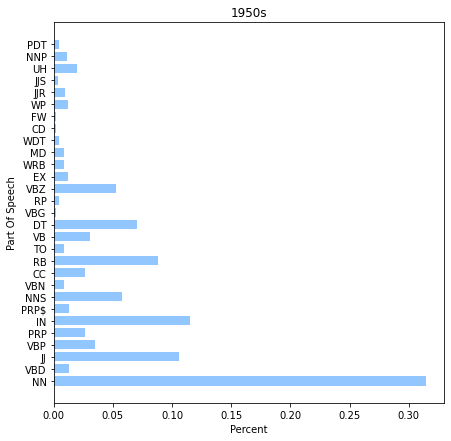

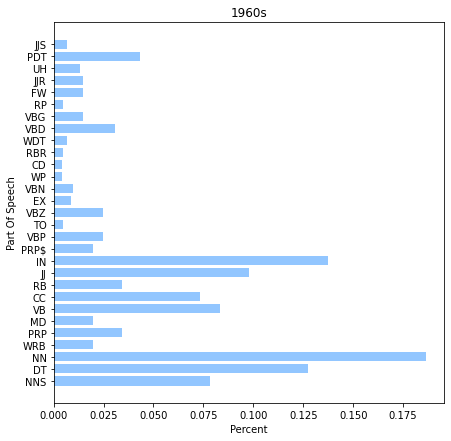

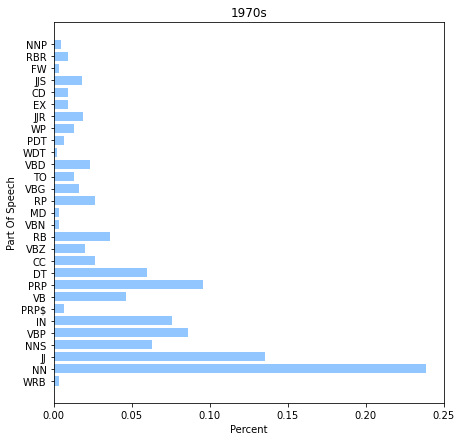

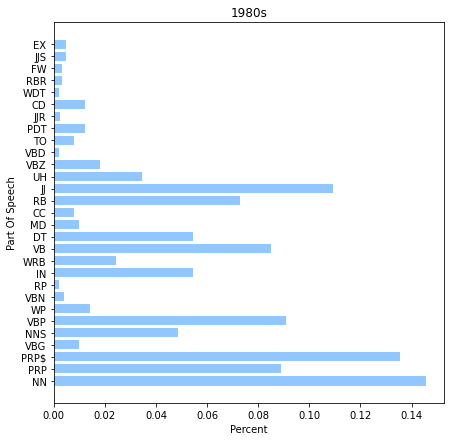

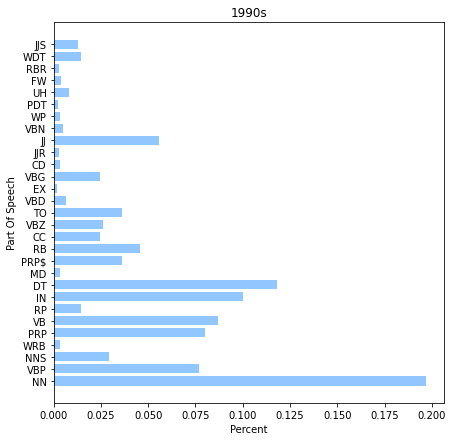

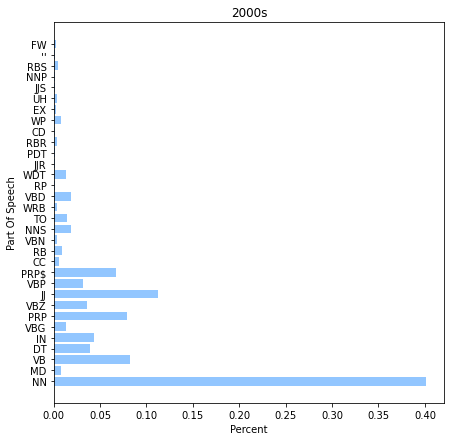

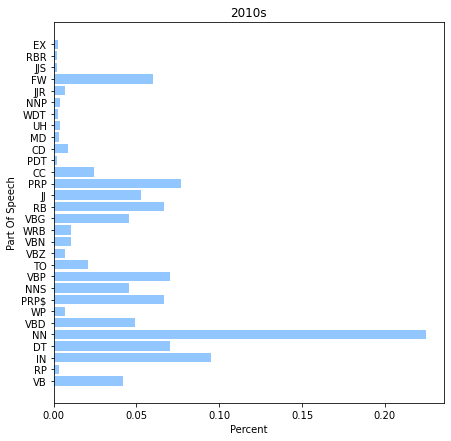

In [37]:
for decade in decade_pos:
    plt.figure(figsize=(7,7))
    plt.title(decade)
    plt.barh(list(decade_pos[decade].keys()), list(decade_pos[decade].values()))
    plt.ylabel("Part Of Speech")
    plt.xlabel("Percent")
    #plt.savefig("img/"+decade+"pos.tiff")
    plt.show();

### Speculative Words

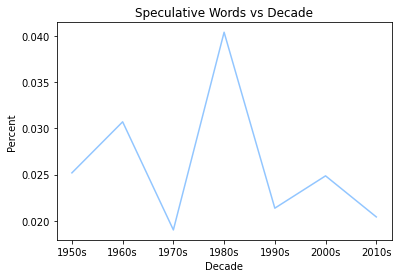

In [38]:
plt.plot(music["Decade"], decade_spec)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Speculative Words vs Decade");
#plt.savefig("img/specvsdecade.tiff");

### Personal Pronouns

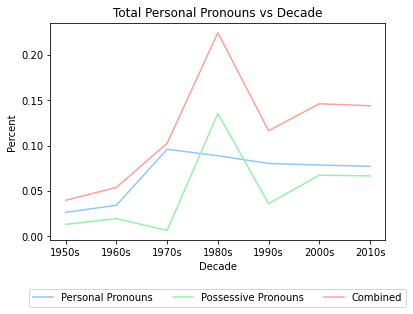

In [39]:
plt.plot(music["Decade"], decade_prp, label="Personal Pronouns")
plt.plot(music["Decade"], decade_prps, label="Possessive Pronouns")
plt.plot(music["Decade"], decade_prgen, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Total Personal Pronouns vs Decade");
#plt.savefig("img/prpvsdecade.tiff");

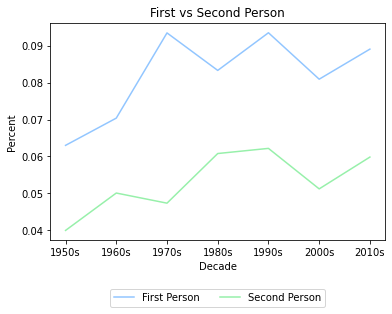

In [40]:
plt.plot(music["Decade"], decade_pov_ego, label="First Person")
plt.plot(music["Decade"], decade_pov_2, label="Second Person")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("First vs Second Person");
#plt.savefig("img/firstvssecond.tiff");

### Intimacy

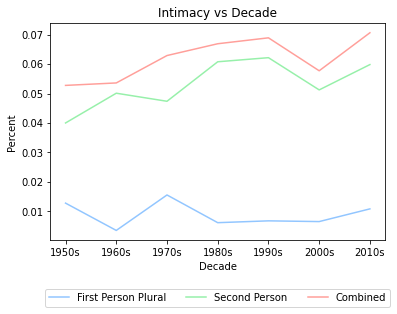

In [41]:
plt.plot(music["Decade"], decade_pov_plural_1, label="First Person Plural")
plt.plot(music["Decade"], decade_pov_2, label="Second Person")
plt.plot(music["Decade"], decade_pov_inc, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Intimacy vs Decade");
#plt.savefig("img/intimvsdecade.tiff");

### Egocentricity

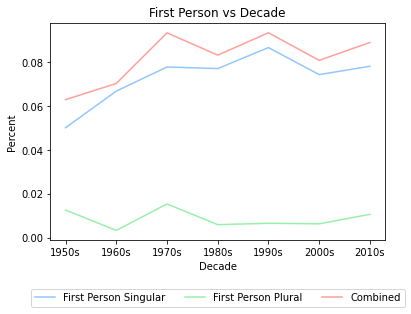

In [42]:
plt.plot(music["Decade"], decade_pov_single_1, label="First Person Singular")
plt.plot(music["Decade"], decade_pov_plural_1, label="First Person Plural")
plt.plot(music["Decade"], decade_pov_ego, label="Combined")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("First Person vs Decade");
#plt.savefig("img/firstvsdecade.tiff");

### Gendered Pronouns

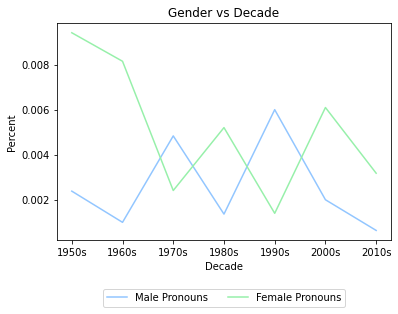

In [43]:
plt.plot(music["Decade"], decade_male, label="Male Pronouns")
plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Gender vs Decade");
#plt.savefig("img/gendervsdecade.tiff");

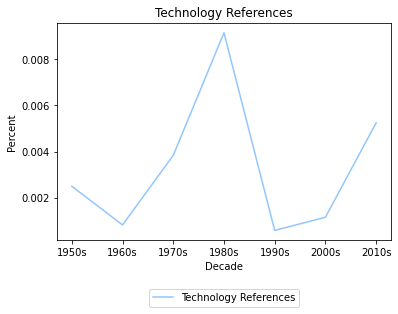

In [44]:
plt.plot(music["Decade"], decade_tech, label="Technology References")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Technology References");
#plt.savefig("img/gendervsdecade.tiff");

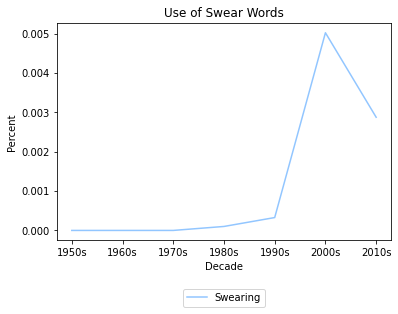

In [45]:
plt.plot(music["Decade"], decade_swear, label="Swearing")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Use of Swear Words");
#plt.savefig("img/gendervsdecade.tiff");

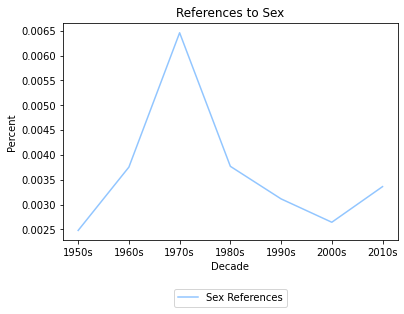

In [46]:
plt.plot(music["Decade"], decade_sex, label="Sex References")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("References to Sex");
#plt.savefig("img/gendervsdecade.tiff");

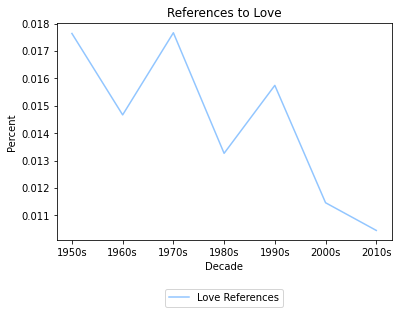

In [73]:
plt.plot(music["Decade"], decade_love, label="Love References")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("References to Love");
#plt.savefig("img/gendervsdecade.tiff");

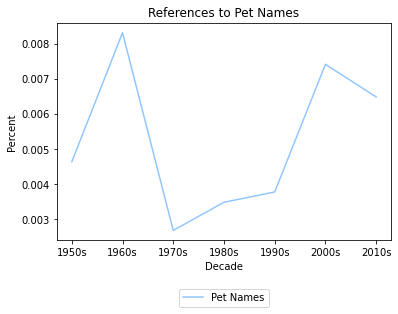

In [48]:
plt.plot(music["Decade"], decade_names, label="Pet Names")
#plt.plot(music["Decade"], decade_female, label="Female Pronouns")
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("References to Pet Names");
#plt.savefig("img/gendervsdecade.tiff");

### Uniqueness (Lexical Diversity)

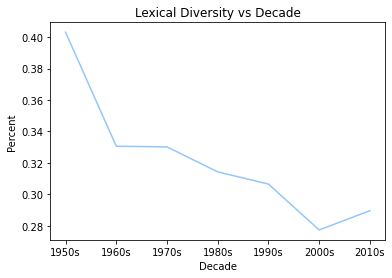

In [49]:
plt.plot(music["Decade"], len_unique_percent)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Lexical Diversity vs Decade");
#plt.savefig("img/uniquestopvsdecade.tiff");

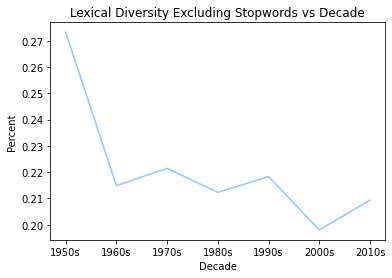

In [50]:
plt.plot(music["Decade"], len_unique_no_stop_percent)
plt.ylabel("Percent")
plt.xlabel("Decade")
plt.title("Lexical Diversity Excluding Stopwords vs Decade");
#plt.savefig("img/uniquenostopcountvsdecade.tiff");

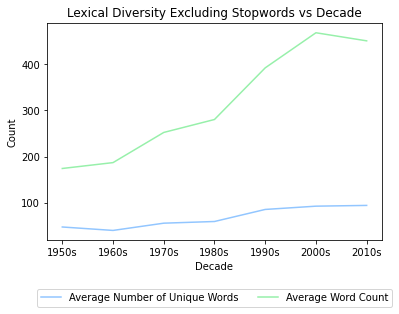

In [51]:
plt.plot(music["Decade"], len_unique_no_stop, label="Average Number of Unique Words")
plt.plot(music["Decade"], music["Avg Word Count"], label="Average Word Count")
plt.ylabel("Count")
plt.xlabel("Decade")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Lexical Diversity Excluding Stopwords vs Decade");
#plt.savefig("img/uniquenostopcountvsdecade.tiff");

## Network Graph

In [52]:
#List of all nodes
all_nodes = []

decades = music["Decade"]
#Removes duplicate years
years = set(data["Year"])
songs = data["Song"]
#Removes quotes around song titles
songs = [song.replace("\"", "") for song in songs]
unique_words_no_stop = unique_lyrics_no_stopwords

all_nodes.extend(decades)
all_nodes.extend(years)
all_nodes.extend(songs)
for decade in unique_words_no_stop:
    for song in decade:
        all_nodes.extend(song)
        
node_type = []
node_type += ["Decade"] * len(decades)
node_type += ["Year"] * len(years)
node_type += ["Song"] * len(songs)
node_type += ["Words"] * (len(all_nodes) - len(node_type))

type_corr = {"Decade":4, "Year":3, "Song":2, "Words":1}
int_type = [type_corr.get(num) for num in node_type]

all_nodes = pd.DataFrame(data={"Id":all_nodes, "Label":all_nodes, "Type":node_type, "Int Type":int_type})
print(all_nodes.shape)
all_nodes.head()

(9547, 4)


,Id,Label,Type,Int Type
0,1950s,1950s,Decade,4
1,1960s,1960s,Decade,4
2,1970s,1970s,Decade,4
3,1980s,1980s,Decade,4
4,1990s,1990s,Decade,4


In [53]:
#List of all edges
src = []
tgt = []

#Edges from years to the decade
points_in_decade = sum(data["Year"].isin(np.arange(data["Year"][0], data["Year"][0] + 10)))
start = 0
for year in decades:
    if start + points_in_decade > len(data["Year"]):
        points_in_decade = len(data["Year"]) - start
    print(list(data["Year"][start:start + points_in_decade]))
    src += list(data["Year"][start:start + points_in_decade])
    tgt += [year] * points_in_decade
    start += points_in_decade
#Edges from songs to years
src += songs
tgt += list(data["Year"])

#Edges from unique words to song
song_ind = 0
for i in np.arange(len(music)):
    
    decade_lyrics = unique_lyrics_no_stopwords[i]
    
    for j in np.arange(len(decade_lyrics)):
        lyrics = decade_lyrics[j]
        src += lyrics
        tgt += [songs[song_ind]] * len(lyrics)
        song_ind += 1

all_edges = pd.DataFrame(data={"Id":np.arange(len(src)), "Source":src, "Target":tgt})
print(all_edges.shape)
all_edges.head()

[1950, 1950, 1951, 1951, 1952, 1952, 1953, 1953, 1954, 1954, 1955, 1955, 1956, 1956, 1957, 1957, 1958, 1958, 1959, 1959]
[1960, 1960, 1961, 1961, 1962, 1962, 1963, 1963, 1964, 1964, 1965, 1965, 1966, 1966, 1967, 1967, 1968, 1968, 1969, 1969]
[1970, 1970, 1971, 1971, 1972, 1972, 1973, 1973, 1974, 1974, 1975, 1975, 1976, 1976, 1977, 1977, 1978, 1978, 1979, 1979]
[1980, 1980, 1981, 1981, 1982, 1982, 1983, 1983, 1984, 1984, 1985, 1985, 1986, 1986, 1987, 1987, 1988, 1988, 1989, 1989]
[1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1994, 1994, 1995, 1995, 1996, 1996, 1997, 1997, 1998, 1998, 1999, 1999]
[2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009]
[2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018]
(9609, 3)


,Id,Source,Target
0,0,1950,1950s
1,1,1950,1950s
2,2,1951,1950s
3,3,1951,1950s
4,4,1952,1950s


In [54]:
all_nodes.to_csv("lyric_nodes.csv",index=False)
all_edges.to_csv("lyric_edges.csv",index=False)

## Visualization
### Gephi
On a .gexf file
## Sentiment Analysis

In [55]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

#total counts the total number of phrases in positive, neutral, and negative
sentiments = ["positive", "neutral", "negative"]
sentiment_summary = {"positive":[], "neutral":[], "negative":[], "total":[]}

#Analyze each phrase (line) and categorize the sentiment.
for i in np.arange(len(music)):
    
    decade = music["Lyrics"][i]
    
    for key in sentiment_summary.keys():
        
        sentiment_summary[key] += [0]
        
    for j in np.arange(len(decade)):
        
        song = decade[j].split("\n")
        
        for phrase in song:
            
            sentiment_score = sid.polarity_scores(phrase)
            
            sentiment_summary["total"][i] += 1
            
            if sentiment_score["compound"] == 0.0:
                sentiment_summary["neutral"][i] += 1
            elif sentiment_score["compound"] > 0.0:
                sentiment_summary["positive"][i] += 1
            else:
                sentiment_summary["negative"][i] += 1

sentiment_summary["neutral"] = [sent/total for sent, total 
                                in zip(sentiment_summary["neutral"],
                                       sentiment_summary["total"])]
sentiment_summary["positive"] = [sent/total for sent, total 
                                in zip(sentiment_summary["positive"],
                                       sentiment_summary["total"])]
sentiment_summary["negative"] = [sent/total for sent, total 
                                in zip(sentiment_summary["negative"],
                                       sentiment_summary["total"])]
                
print(sentiment_summary)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /opt/conda/nltk_data...


{'positive': [0.3240223463687151, 0.28762541806020064, 0.27320261437908494, 0.26393629124004553, 0.25516693163751986, 0.23166926677067082, 0.343205574912892], 'neutral': [0.5083798882681564, 0.5752508361204013, 0.5869281045751634, 0.5779294653014789, 0.5866454689984102, 0.5811232449297972, 0.5043554006968641], 'negative': [0.16759776536312848, 0.13712374581939799, 0.13986928104575164, 0.15813424345847554, 0.15818759936406995, 0.187207488299532, 0.1524390243902439], 'total': [537, 598, 765, 879, 1258, 1282, 1148]}


## Visualization

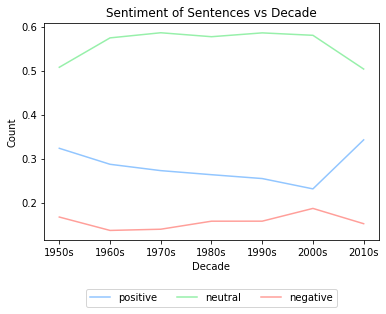

In [56]:
for sentiment in sentiments:
    plt.plot(music["Decade"], sentiment_summary[sentiment], label=sentiment)
plt.ylabel("Count")
plt.xlabel("Decade")
plt.title("Sentiment of Sentences vs Decade");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3);
#plt.savefig("img/sentvsdecade.tiff");

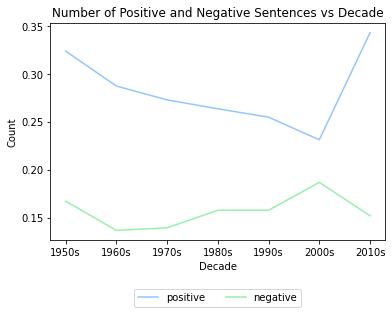

In [57]:
plt.plot(music["Decade"], sentiment_summary[sentiments[0]], label=sentiments[0])
plt.plot(music["Decade"], sentiment_summary[sentiments[2]], label=sentiments[2])
plt.ylabel("Count")
plt.xlabel("Decade")
plt.title("Number of Positive and Negative Sentences vs Decade");
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3);
#plt.savefig("img/posnegvsdecade.tiff");

## Common Words

In [58]:
#Creating lyrics lists

#By decade
lyrics_by_decade_list = []

#Overall
lyrics_freq_list = []

for i in np.arange(len(music)):
    
    decade = decade_pos_tag[i]
    lyrics_by_decade_list += [[]]
    
    for j in np.arange(len(decade)):
        
        song = decade[j]
        
        #Removing stopwords
        lyrics = [lemmatize(word, tag) for (word, tag) in song]
        lyrics = [w for w in lyrics if not w in stop_words]
        
        lyrics_by_decade_list[i] += lyrics
        lyrics_freq_list += lyrics


#Converting lyrics lists to counters
#By decade
lyrics_by_decade = [Counter(lyrics) for lyrics in lyrics_by_decade_list]

#Overall
lyrics_freq = Counter(lyrics_freq_list)

In [59]:
decade_lyric_freqs = [pd.DataFrame(data={"Word":list(decade.keys()),
                                         "Count":list(decade.values())})
                      .sort_values("Count", ascending=False)
                      for decade in lyrics_by_decade]
decade_lyric_freqs[0].head()

,Word,Count
4,dream,36
306,rock,34
107,love,32
161,im,25
48,lonely,25


In [60]:
overall_lyric_freq = pd.DataFrame(data={"Word":list(lyrics_freq.keys()),
                                        "Count":list(lyrics_freq.values())})
overall_lyric_freq = overall_lyric_freq.sort_values("Count", ascending=False)
overall_lyric_freq.head()

,Word,Count
8,get,488
161,im,417
107,love,396
135,know,375
128,dont,307


In [61]:
vectorizer = TfidfVectorizer(max_df=0.80, min_df=3, max_features=5000, stop_words=stop_words)

decade_lyrics = []

for i in np.arange(len(music["Lyrics w/o Punctuation"])):
    decade_lyrics += [" ".join(music["Lyrics w/o Punctuation"][i])]

tfidf = vectorizer.fit_transform(decade_lyrics)
tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

common = []

for i in np.arange(len(music)):
    print("Most common words of", music["Decade"][i], "are:")
    common += [tfidf.iloc[i].sort_values(ascending=False)]
    print(tfidf.iloc[i].sort_values(ascending=False).head(), "\n")

Most common words of 1950s are:
rock       0.573309
dream      0.472137
clock      0.221560
tonight    0.177248
die        0.151758
Name: 0, dtype: float64 

Most common words of 1960s are:
honey       0.442949
cry         0.391839
loves       0.252833
sunshine    0.224009
wrote       0.156807
Name: 1, dtype: float64 

Most common words of 1970s are:
breaking    0.461628
fever       0.365545
girls       0.303280
gave        0.274091
dancing     0.176913
Name: 2, dtype: float64 

Most common words of 1980s are:
faith    0.459513
body     0.287066
talk     0.274585
whats    0.242222
gotta    0.212179
Name: 3, dtype: float64 

Most common words of 1990s are:
belong    0.286381
boy       0.250862
dig       0.243804
enough    0.236575
saw       0.207233
Name: 4, dtype: float64 

Most common words of 2000s are:
low     0.531548
shit    0.328309
yet     0.273591
aint    0.273467
read    0.234506
Name: 5, dtype: float64 

Most common words of 2010s are:
happy        0.415079
maybe        0.256

In [62]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, random_state=0)
lda = lda.fit(tfidf)

In [63]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [64]:
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 50)


Topic #0:
rock dream clock tonight die many true babe con kiss old turning ago town wanted til god lips bright near whenever white shell huh em couldnt looked lot someday begin wasnt gray letters street mean part cry young ten touched pass room although lover gave sometimes six la catch work

Topic #1:
happy maybe along sorry hands everybody hot good body met party watch deep somebody hit damn fall tonight bring late rock wish lead going room uh getting crazy sound looking girls dark truth fight falling yo blow house pocket whoo storm shit kiss talk ready hate mi road shake somethin

Topic #2:
low breaking honey aint cry fever yet girls shit gave nobody loves face read sunshine light ah gimme gotta burn pieces fun sky wrote brown dancing pour taking sweet sun help knows friend shine uh beat whole weve days hide goodbye fall makes hard couldnt isnt hit open thing warm

Topic #3:
faith body talk whats gotta maybe shell watching dance lover eye cry anytime talkin good move says sure step

In [65]:
n_topics = 2
for i in range(len(music["Lyrics"])):
    print("\nTopics of the", music["Decade"][i]+":")
    decade_vec = TfidfVectorizer(max_df=0.80, min_df=3, max_features=5000, stop_words=stop_words)
    decade_tfidf = decade_vec.fit_transform(music["Lyrics w/o Punctuation"][i])
    decade_lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, random_state=0)
    decade_lda = decade_lda.fit(decade_tfidf)
    decade_tf_feature_names = decade_vec.get_feature_names()
    print_top_words(decade_lda, decade_tf_feature_names, 50)


Topics of the 1950s:

Topic #0:
oh ago see long someone town could arms dreams know many find theres ill little go really river take new eyes bright one round said part night never well two may say ever hear come like true must start always made life way youre heart love dont kiss around please

Topic #1:
love heart im lonely smile like dont kiss ever day around may well always youre ill way die away say please true life near lips night made little mine must never pass know dreams many could bright youll part start take theres two arms hear eyes see one come someone

Topics of the 1960s:

Topic #0:
let want tell time gone ive way gonna love someone friend say ill pretend live heart long like know cant youre youll mind got make come man well im go knows dreams start right understand feel since little apart see alone sweet true one blue life kissed oh sun yeah

Topic #1:
yeah dont im love cant get go cause baby summer know blue world got take lonely eyes come oh one heart dreams alone l

## Visualization
### Top 10 most Frequent Words
#### By Decade

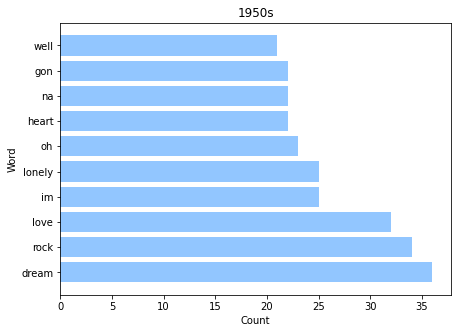

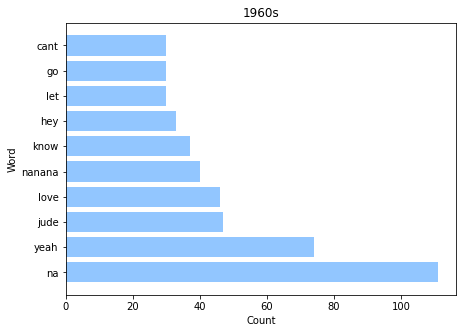

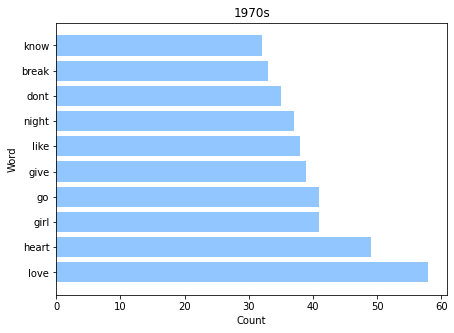

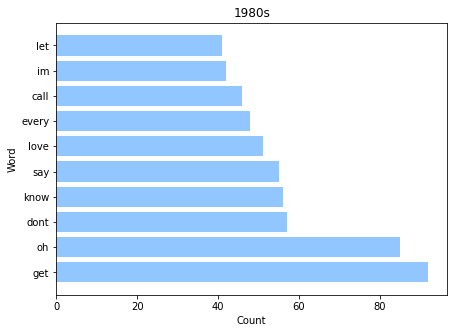

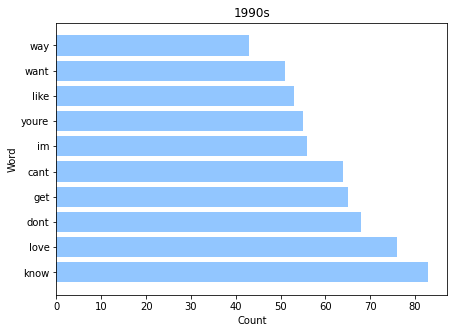

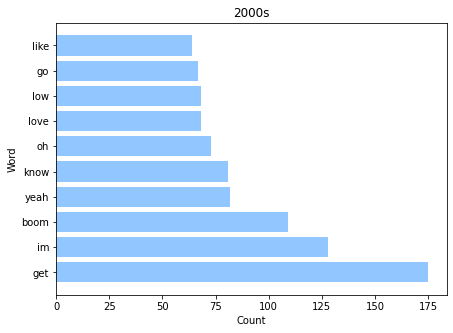

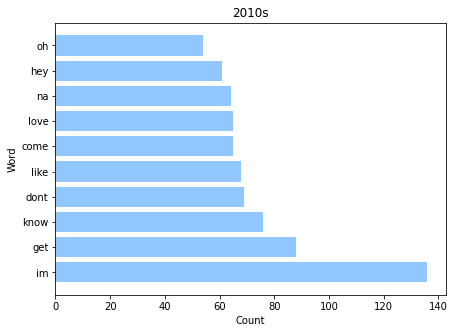

In [66]:
titles = music["Decade"]
i = 0
words_10 = []
for decade in decade_lyric_freqs:
    words_10.extend(list(decade["Word"]))
    plt.figure(figsize=(7,5))
    plt.barh(decade["Word"][:10], decade["Count"][:10])
    plt.title(titles[i])
    plt.ylabel("Word")
    plt.xlabel("Count")
    #plt.savefig("img/"+titles[i]+"wordbar.tiff")
    plt.show();
    i += 1
words_10 = Counter(words_10)

In [67]:
#max is 7
words_10_duplicates = [i for i in words_10.elements() if words_10[i] > 6]
print(Counter(words_10_duplicates))

Counter({'love': 7, 'im': 7, 'oh': 7, 'heart': 7, 'na': 7, 'gon': 7, 'well': 7, 'say': 7, 'ill': 7, 'want': 7, 'dont': 7, 'like': 7, 'baby': 7, 'could': 7, 'day': 7, 'give': 7, 'know': 7, 'see': 7, 'someone': 7, 'go': 7, 'always': 7, 'thats': 7, 'way': 7, 'take': 7, 'make': 7, 'get': 7, 'look': 7, 'youre': 7, 'please': 7, 'night': 7, 'never': 7, 'find': 7, 'let': 7, 'away': 7, 'turn': 7, 'come': 7, 'thing': 7, 'life': 7, 'break': 7, 'hold': 7, 'one': 7, 'back': 7, 'cry': 7, 'hand': 7, 'youll': 7, 'wait': 7, 'long': 7, 'think': 7, 'time': 7, 'stop': 7, 'two': 7, 'start': 7, 'mine': 7, 'touch': 7, 'live': 7, 'yeah': 7, 'nothing': 7, 'last': 7, 'line': 7, 'right': 7, 'lose': 7, 'need': 7, 'tell': 7, 'feel': 7, 'hear': 7, 'eye': 7, 'id': 7, 'every': 7, 'girl': 7, 'walk': 7, 'cant': 7, 'leave': 7, 'still': 7, 'mind': 7, 'stand': 7, 'share': 7, 'cause': 7, 'ive': 7, 'home': 7, 'ooh': 7, 'another': 7, 'call': 7, 'much': 7, 'name': 7, 'play': 7, 'dance': 7, 'star': 7, 'inside': 7, 'try': 7, 'a

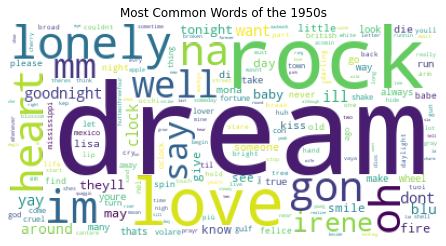

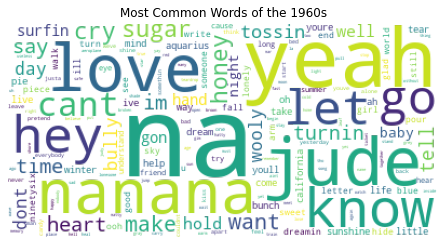

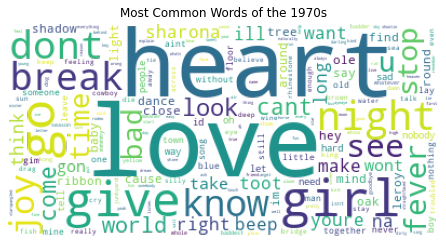

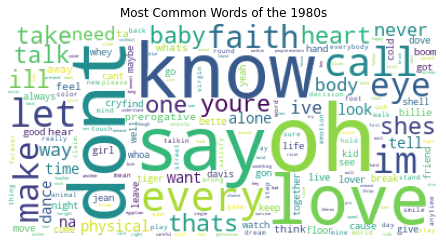

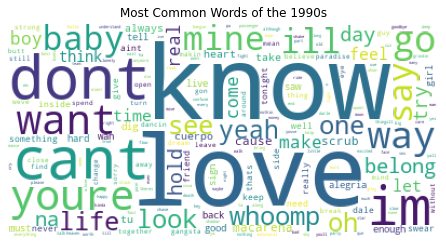

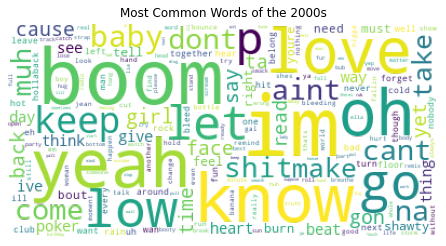

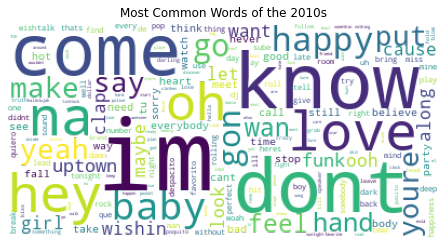

In [68]:
titles = music["Decade"]
i = 0

for decade in lyrics_by_decade_list:
    decade = " ".join(decade)
    wordcloud = WordCloud(mode="RGBA", background_color=None, collocations=False).generate(decade)
    fig = plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title("Most Common Words of the " + titles[i])
    plt.show();
    #wordcloud.to_file("img/"+titles[i]+"words.tiff")
    i += 1

#### Overall

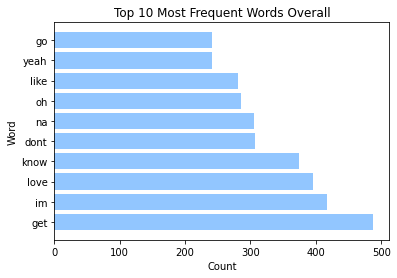

In [69]:
plt.barh(overall_lyric_freq["Word"][:10], overall_lyric_freq["Count"][:10])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 10 Most Frequent Words Overall");
#plt.savefig("img/overallwordbar.tiff");

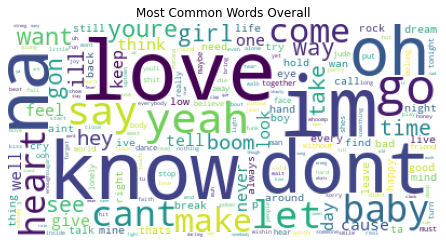

In [70]:
overall = " ".join(lyrics_freq_list)
wordcloud = WordCloud(mode="RGBA", background_color=None, collocations=False).generate(overall)
fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Most Common Words Overall")
plt.show();
#wordcloud.to_file("img/overallwords.tiff");

### TF-IDF

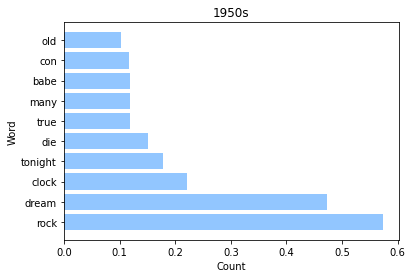

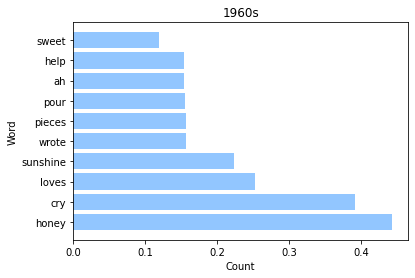

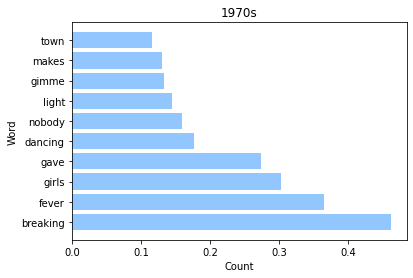

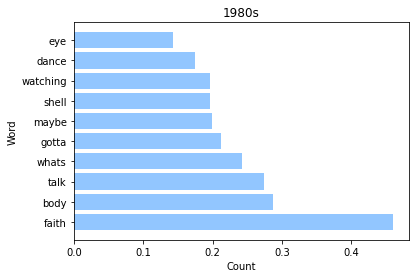

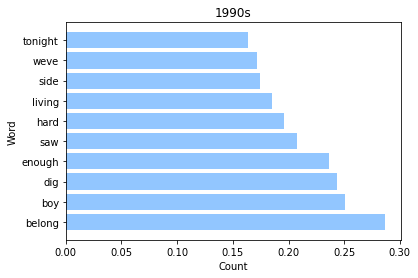

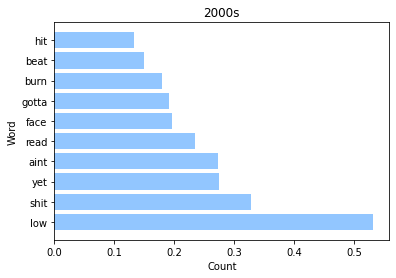

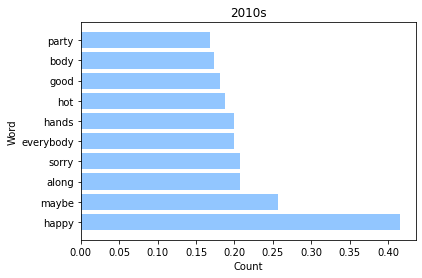

In [71]:
titles = music["Decade"]
i = 0

for decade in common:
    plt.barh(decade.index[:10], decade[:10])
    plt.title(titles[i])
    plt.xlabel("Count")
    plt.ylabel("Word")
    #plt.savefig("img/"+titles[i]+"wordbar.tiff")
    plt.show();
    i += 1

# Conclusion and Further Paths of Research


# Related Works and What I Could've Done Better

# Things to Consider Next Time
